In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/project/imagerecognition', validation_size = 0)

Extracting /home/project/imagerecognition/train-images-idx3-ubyte.gz
Extracting /home/project/imagerecognition/train-labels-idx1-ubyte.gz
Extracting /home/project/imagerecognition/t10k-images-idx3-ubyte.gz
Extracting /home/project/imagerecognition/t10k-labels-idx1-ubyte.gz


(60000, 784)


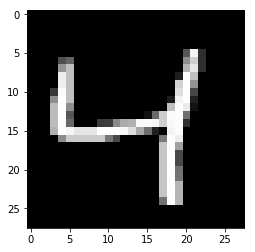

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap = 'Greys_r')

Calculate the loss with cross entropy

In [23]:
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs = tf.placeholder(tf.float32, (None, image_size))

w1 = tf.Variable(tf.random_normal([image_size, encoding_dim], stddev = 0.5))
b1 = tf.Variable(tf.random_normal([encoding_dim], stddev = 0.1))
encoded = tf.nn.sigmoid(tf.matmul(inputs, w1) + b1)

w2 = tf.Variable(tf.random_normal([encoding_dim, image_size], stddev = 0.5))
b2 = tf.Variable(tf.random_normal([image_size], stddev = 0.1))

logits = tf.matmul(encoded, w2) + b2
decoded = tf.nn.sigmoid(logits)

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = inputs, logits = logits))
opt = tf.train.RMSPropOptimizer(0.01).minimize(loss)

In [27]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

EPOCH = 30
BATCH_SIZE = 500
for i in xrange(EPOCH):
    TOTAL_LOST = 0
    for k in xrange(mnist.train.num_examples // BATCH_SIZE):
        batch = mnist.train.next_batch(BATCH_SIZE)
        batch_cost, _ = sess.run([loss, opt], feed_dict = {inputs: batch[0]})
        TOTAL_LOST += batch_cost
    
    print 'Epoch:' + str(i + 1) + ', loss: ' + str(TOTAL_LOST / (mnist.train.num_examples // BATCH_SIZE) * 1.0)

Epoch:1, loss: 0.945778383811
Epoch:2, loss: 0.372149583201
Epoch:3, loss: 0.203639525548
Epoch:4, loss: 0.170378120368
Epoch:5, loss: 0.158340733623
Epoch:6, loss: 0.151549508671
Epoch:7, loss: 0.147009582569
Epoch:8, loss: 0.143221683179
Epoch:9, loss: 0.140130865698
Epoch:10, loss: 0.137612958873
Epoch:11, loss: 0.134874273837
Epoch:12, loss: 0.132911133394
Epoch:13, loss: 0.131312587423
Epoch:14, loss: 0.130302533507
Epoch:15, loss: 0.128957149324
Epoch:16, loss: 0.127922902256
Epoch:17, loss: 0.126893529482
Epoch:18, loss: 0.125848512414
Epoch:19, loss: 0.1245325805
Epoch:20, loss: 0.123408065302
Epoch:21, loss: 0.122691618527
Epoch:22, loss: 0.122246432801
Epoch:23, loss: 0.121603340283
Epoch:24, loss: 0.121025699005
Epoch:25, loss: 0.120578318338
Epoch:26, loss: 0.120037087798
Epoch:27, loss: 0.119735989782
Epoch:28, loss: 0.119331464668
Epoch:29, loss: 0.118963924671
Epoch:30, loss: 0.118624932008


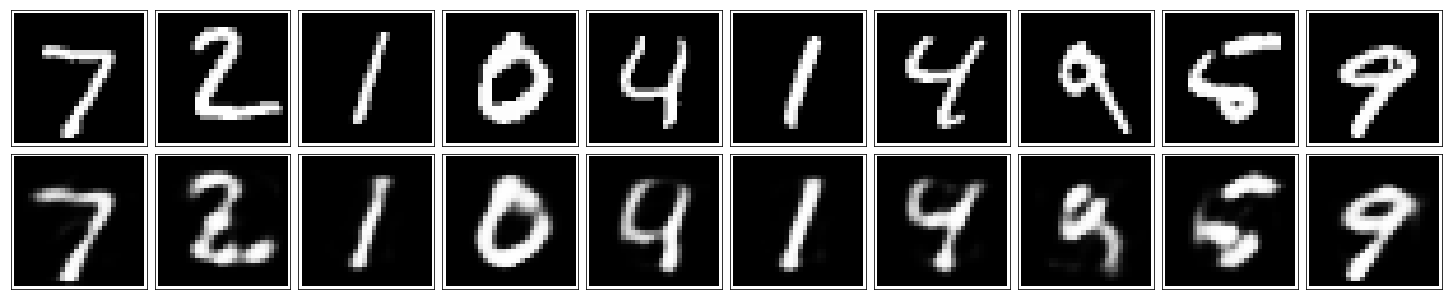

In [25]:
fig, axes = plt.subplots(nrows =2, ncols =10, sharex = True, sharey = True, figsize = (20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict = {inputs: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad = 0.1)